# Code Clause Internship

## Allocated Task - Loan Prediction

Code Author - Manoj Kumar

Data Science Virtual Internship 2023

### Import required modules

In [140]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Read the Dataset

In [141]:
df=pd.read_csv('E:\Mano@workspace\Datasets\Loan_Data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Analyse

In [142]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [143]:
df.shape

(614, 13)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [145]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [146]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: >

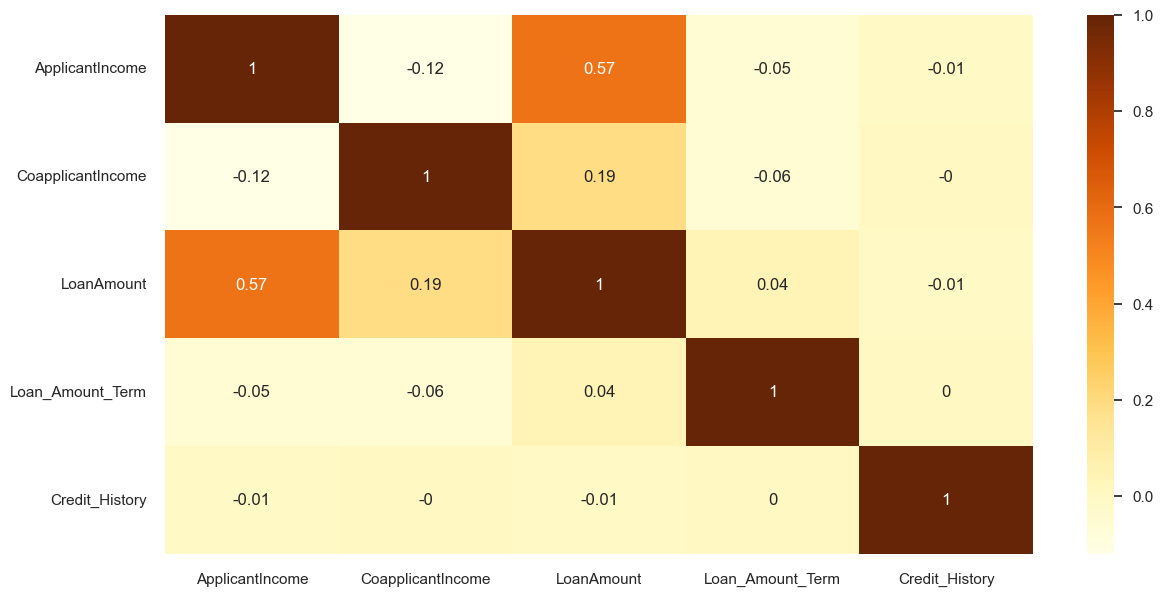

In [148]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

<AxesSubplot: xlabel='Credit_History', ylabel='count'>

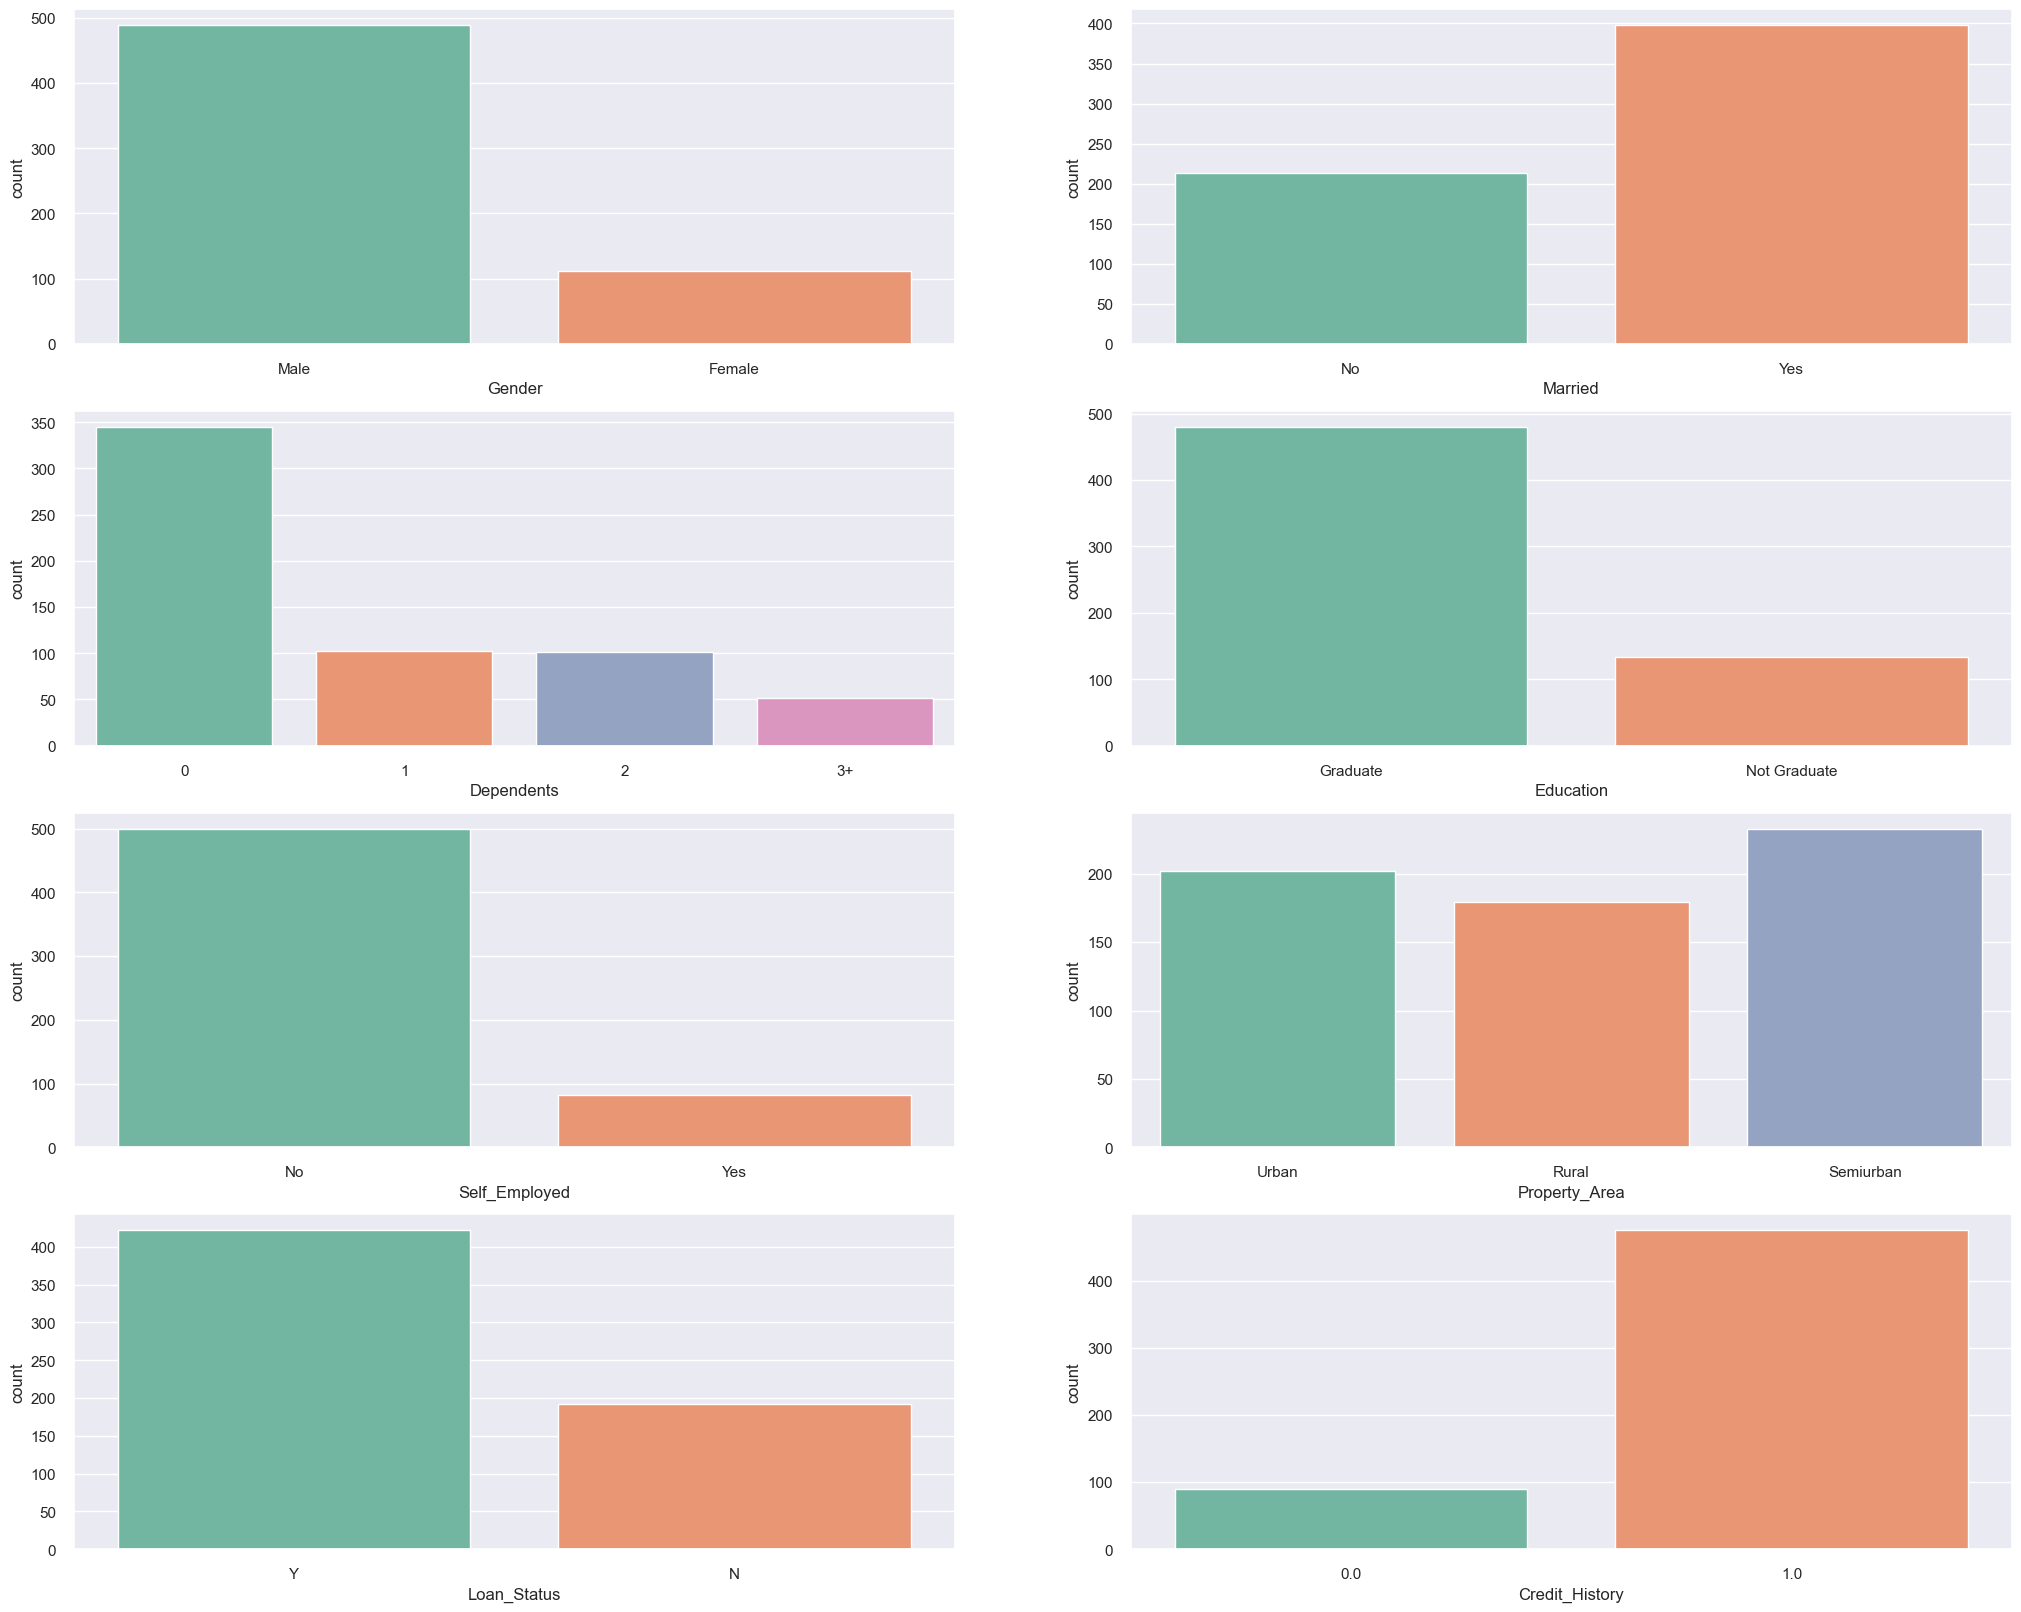

In [149]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Gender', palette = 'Set2', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'Married', palette = 'Set2', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', palette = 'Set2', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'Education', palette = 'Set2', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed', palette = 'Set2', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'Property_Area', palette = 'Set2', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'Loan_Status', palette = 'Set2', data = df)

plt.subplot(4,2,8)
sns.countplot(x = 'Credit_History', palette = 'Set2', data = df)

<AxesSubplot: xlabel='Loan_Amount_Term'>

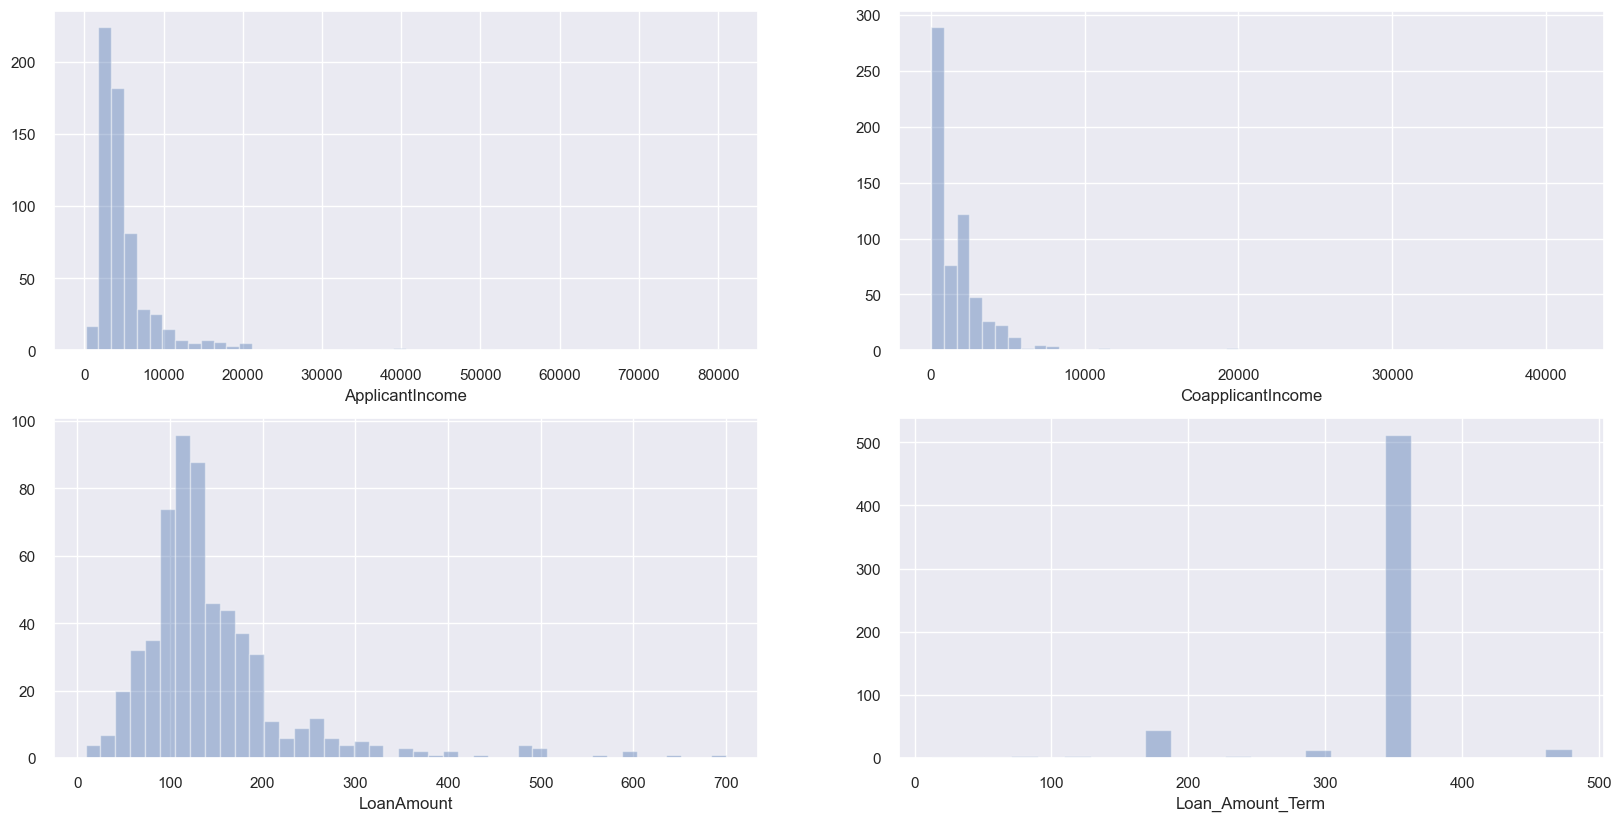

In [150]:
plt.figure(figsize = (20,15))
sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.distplot(df['ApplicantIncome'], kde = False)

plt.subplot(3,2,2)
sns.distplot(df['CoapplicantIncome'], kde = False)

plt.subplot(3,2,3)
sns.distplot(df['LoanAmount'], kde = False)

plt.subplot(3,2,4)
sns.distplot(df['Loan_Amount_Term'], kde = False)

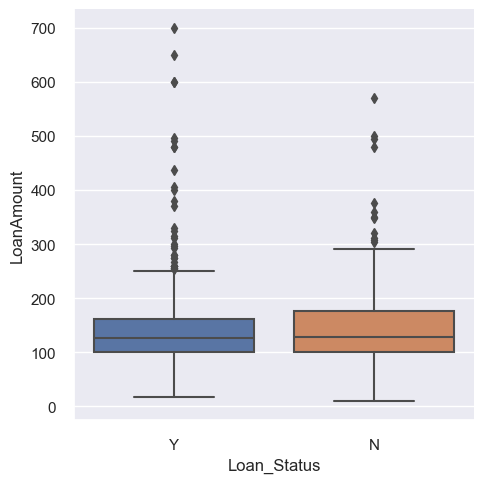

In [151]:
sns.catplot(x = 'Loan_Status', y="LoanAmount", kind="box", data = df)

### Data Preprocessing

In [152]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [153]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace = True)

In [154]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [155]:
df.drop(columns = ['LoanAmount'], inplace = True)

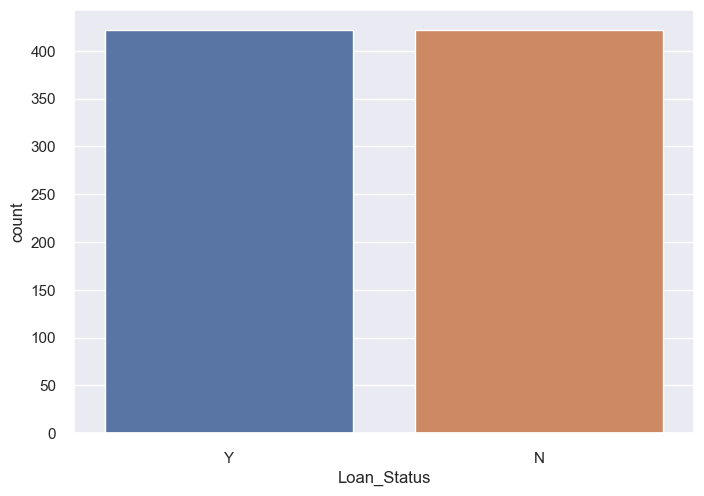

In [156]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']
x, y = ros.fit_resample(x, y)
ax = sns.countplot(x=y)

### Outlier Treatment

In [157]:
df1=pd.concat([x,y],axis=1)
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y


In [158]:
cat_cols = ['Dependents','Gender','Married','Education','Self_Employed','Credit_History','Property_Area']
dummies = pd.get_dummies(df1[cat_cols])
dummies

,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1
1,1.0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0
2,1.0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1
3,1.0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1
4,1.0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,0.0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0
840,1.0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1
841,1.0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
842,0.0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0


In [159]:
df1 = pd.concat([df1, dummies], axis = 1)

In [160]:
df1 = df1.drop(cat_cols, axis = 1)

In [161]:
y.value_counts()

Y    422
N    422
Name: Loan_Status, dtype: int64

In [162]:
from sklearn.preprocessing import LabelEncoder

In [163]:
df1['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
839    N
840    N
841    N
842    N
843    N
Name: Loan_Status, Length: 844, dtype: object

In [164]:
labelencoder=LabelEncoder()

In [165]:
df1=df1.drop(columns=['Loan_ID'])

In [166]:
y = labelencoder.fit_transform(df1['Loan_Status'])

In [167]:
x = df1.drop(columns = ['Loan_Status'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42, stratify = y)

In [168]:
x_train.shape


(633, 18)

In [169]:
x_test.shape

(211, 18)

In [170]:
y_train.shape

(633,)

In [171]:
y_test.shape

(211,)

In [172]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [173]:
rf = RandomForestClassifier(random_state = 42, class_weight = 'balanced')
rf.fit(x_train, y_train)
predictions_rf = rf.predict(x_test)
predictions_rf.shape

(211,)

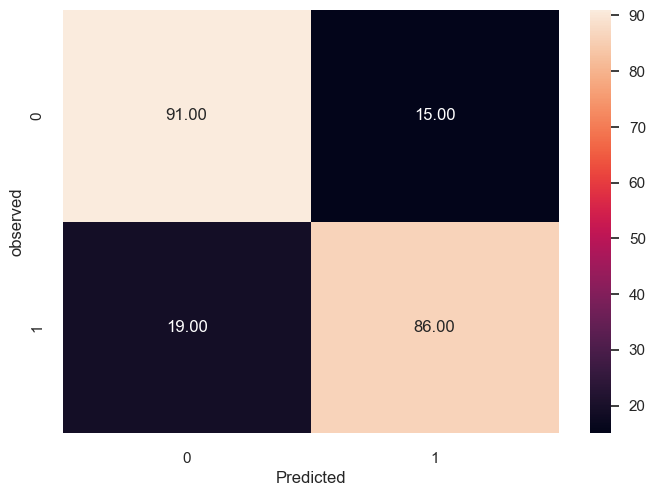

In [174]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()
draw_cm(y_test, predictions_rf)

In [175]:
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       106
           1       0.85      0.82      0.83       105

    accuracy                           0.84       211
   macro avg       0.84      0.84      0.84       211
weighted avg       0.84      0.84      0.84       211



### Logistic Regression Classifier

In [176]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [177]:
lr = LogisticRegression(random_state = 42, class_weight = None)
lr.fit(x_train, y_train)
predictions_lr = lr.predict(x_test)

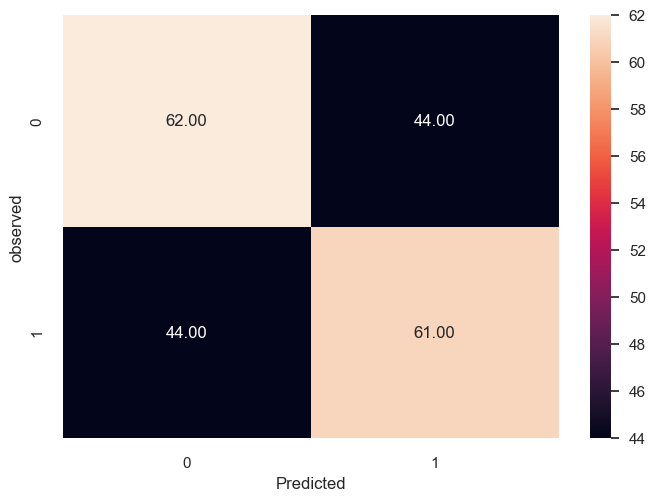

In [178]:
draw_cm(y_test, predictions_lr)

### KNN Classifier

In [179]:
from sklearn.neighbors import KNeighborsClassifier

In [180]:
knn = KNeighborsClassifier(n_neighbors = 10, algorithm = 'kd_tree')
knn.fit(x_train, y_train)
predictions_knn = knn.predict(x_test)

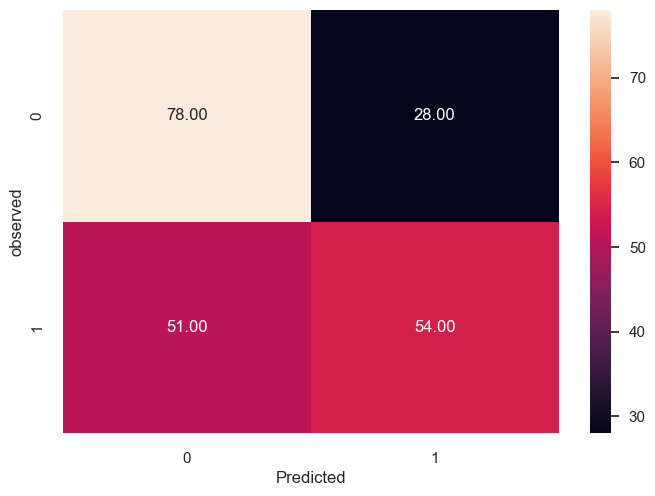

In [181]:
draw_cm(y_test, predictions_knn)

In [182]:
from sklearn.metrics import roc_auc_score, roc_curve

In [183]:
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.8387690925426774


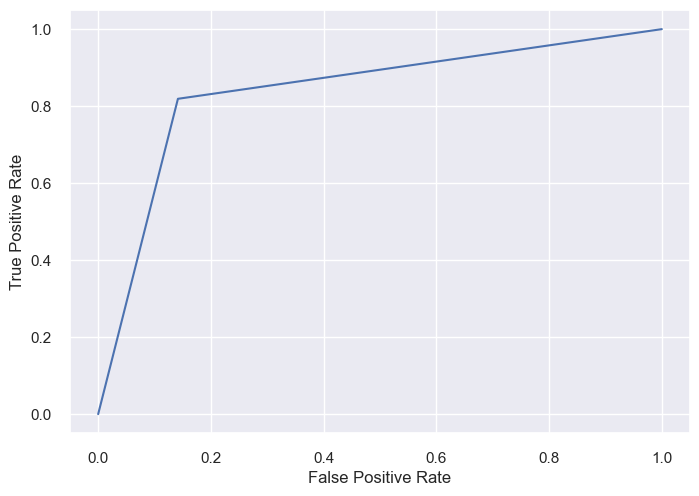

In [184]:
plot_roc_curve(y_test, predictions_rf)
print(f'model 1 AUC score: {roc_auc_score(y_test, predictions_rf)}')

In [185]:
importances=rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df1.columns
 
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) ApplicantIncome                0.408282
 2) CoapplicantIncome              0.214944
 3) Loan_Amount_Term               0.059241
 4) Self_Employed_Yes              0.029094
 5) Property_Area_Rural            0.028015
 6) Loan_Status                    0.026365
 7) Dependents_0                   0.023328
 8) Dependents_1                   0.022921
 9) Property_Area_Semiurban        0.022681
10) Dependents_2                   0.022027
11) Education_Not Graduate         0.020029
12) Married_Yes                    0.019672
13) Self_Employed_No               0.018725
14) Married_No                     0.018395
15) Education_Graduate             0.017152
16) Gender_Male                    0.017074
17) Dependents_3+                  0.016579
18) Gender_Female                  0.015476


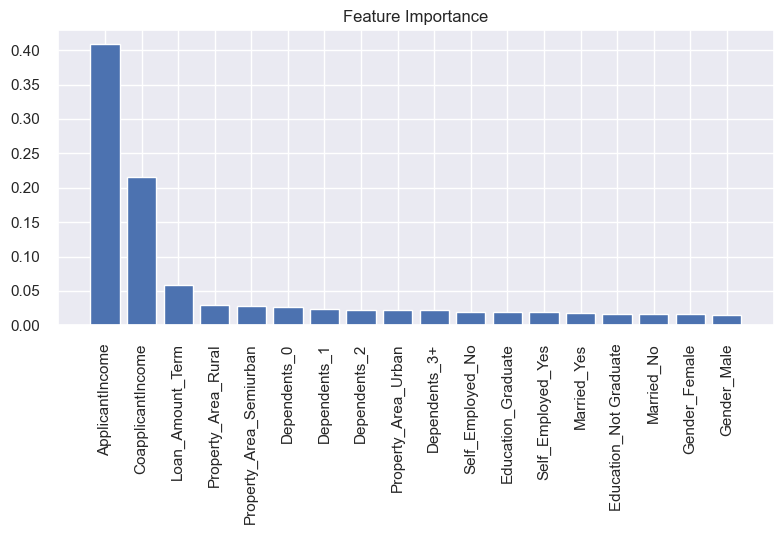

In [186]:
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()